<a href="https://colab.research.google.com/github/Danielewicz-code/Credit-Card-Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder
from imblearn.over_sampling import SMOTE

#model
from sklearn.naive_bayes import GaussianNB



In [125]:
data = pd.read_csv('creditcard_csv.csv')

In [28]:
data.shape

(1982, 31)

In [47]:
#for class 1 is fraud and 0 is not
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1982 non-null   int64  
 1   V1      1982 non-null   float64
 2   V2      1982 non-null   float64
 3   V3      1982 non-null   float64
 4   V4      1982 non-null   float64
 5   V5      1982 non-null   float64
 6   V6      1982 non-null   float64
 7   V7      1982 non-null   float64
 8   V8      1982 non-null   float64
 9   V9      1982 non-null   float64
 10  V10     1982 non-null   float64
 11  V11     1982 non-null   float64
 12  V12     1982 non-null   float64
 13  V13     1982 non-null   float64
 14  V14     1982 non-null   float64
 15  V15     1982 non-null   float64
 16  V16     1982 non-null   float64
 17  V17     1982 non-null   float64
 18  V18     1982 non-null   float64
 19  V19     1982 non-null   float64
 20  V20     1982 non-null   float64
 21  V21     1982 non-null   float64
 22  

In [6]:
#searching for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

It´s just one value so we are gonna bring it down to the class level

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,...,1982.000000,1982.000000,1982.000000,1982.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,759.493441,-0.282993,0.264972,0.847194,0.150490,-0.077024,0.051680,0.137612,-0.059402,0.013296,...,0.057469,-0.011446,-0.144053,-0.043140,0.013022,0.108858,0.049119,0.026718,-0.002325,68.695235
std,450.178662,1.354353,1.142240,1.013441,1.264470,1.273717,1.275015,1.141717,0.967290,0.900760,...,0.571120,0.653646,0.588425,0.353148,0.601666,0.408138,0.454631,0.369579,0.273002,241.907484
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-11.748689,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000
25%,365.250000,-1.045512,-0.204705,0.279877,-0.670513,-0.576269,-0.691065,-0.288708,-0.172631,-0.477535,...,-0.130115,-0.226879,-0.547314,-0.181508,-0.351875,-0.149766,-0.281961,-0.049522,-0.021656,4.950000
50%,748.500000,-0.436020,0.311139,0.863988,0.191547,-0.153731,-0.197341,0.115812,0.037598,-0.033045,...,0.007509,-0.087276,-0.151669,-0.057284,0.091900,0.133481,0.035166,0.022828,0.022517,15.130000
75%,1159.000000,1.095410,0.924542,1.486942,1.002546,0.378642,0.391840,0.568012,0.279147,0.449706,...,0.176935,0.083325,0.253003,0.065045,0.428364,0.383897,0.303731,0.139305,0.090689,63.650000
max,1524.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,7.744222,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000


In [26]:
print(data['Class'].unique())

["'0'" "'1'" nan]


now i´m are gonna clean the dataset

In [126]:
#level the dataset
new_data = data.dropna(subset= 'Class')

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1981 non-null   int64  
 1   V1      1981 non-null   float64
 2   V2      1981 non-null   float64
 3   V3      1981 non-null   float64
 4   V4      1981 non-null   float64
 5   V5      1981 non-null   float64
 6   V6      1981 non-null   float64
 7   V7      1981 non-null   float64
 8   V8      1981 non-null   float64
 9   V9      1981 non-null   float64
 10  V10     1981 non-null   float64
 11  V11     1981 non-null   float64
 12  V12     1981 non-null   float64
 13  V13     1981 non-null   float64
 14  V14     1981 non-null   float64
 15  V15     1981 non-null   float64
 16  V16     1981 non-null   float64
 17  V17     1981 non-null   float64
 18  V18     1981 non-null   float64
 19  V19     1981 non-null   float64
 20  V20     1981 non-null   float64
 21  V21     1981 non-null   float64
 22  

In [96]:
print(new_data['Class'].unique())

["'0'" "'1'"]


In [119]:
#we scale the data for accuracy

scaler = StandardScaler()

data_to_scale = [
  "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
 "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
 "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"
]


new_data[data_to_scale] = scaler.fit_transform(new_data[data_to_scale])

In [54]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,'0'
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,'0'
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,'0'
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,'0'
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,'0'


In [127]:
#we just binarize the class value that was an object

#label encoding the objects
encoder= LabelEncoder()

encode = ['Class']


for feature in encode:
  new_data[feature] = encoder.fit_transform(new_data[feature])

print('encoding completed')

encoding completed


In [75]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


we are ready for making the model, we are gonna use something called gaussian discriminant analysis (GDA)

In [128]:
X = new_data.drop('Class', axis= 1)
Y = new_data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state= 69)

print('data split successfully')

data split successfully


In [129]:
#we use smote for the model to learn more about the data
smote = SMOTE(sampling_strategy= 'auto', random_state= 69)

X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [130]:
#create the ML model
model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB()

In [131]:
train_score= model.score(X_train, Y_train)
test_score= model.score(X_test, Y_test)

pred = model.predict(X_test)

cm= confusion_matrix(pred, Y_test)

print(f'this is the training score: {train_score}')
print(f'this is the test score: {test_score}')
print('this is the confusion matrix:')
print(cm)

this is the training score: 0.8703105284215061
this is the test score: 0.9927144412064183
this is the confusion matrix:
[[56469    20]
 [  395    78]]


visualize the ROC curve

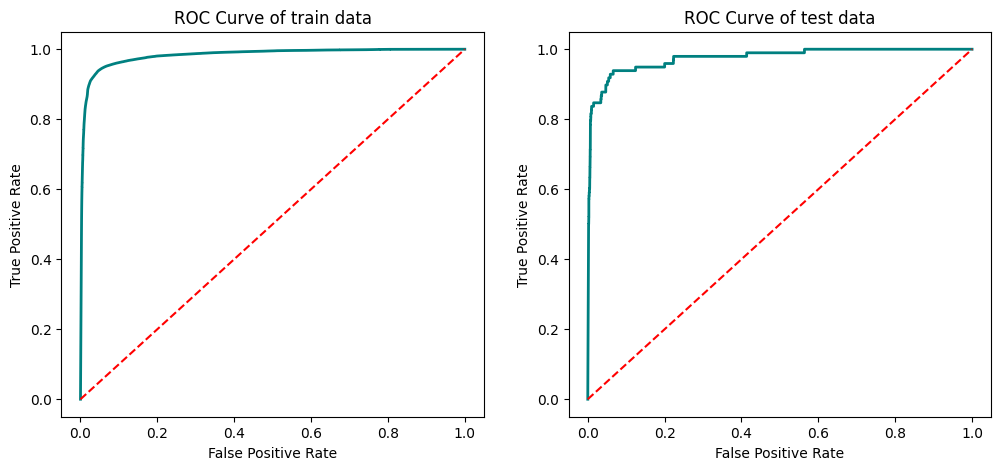

In [118]:
from seaborn._core.properties import LineWidth
#bring data samples and predict for each one
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob= model.predict_proba(X_test)[:, 1]

#calculate the roc curve
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_train_pred_prob)
fpr_test, tpr_test, thereshold_test = roc_curve(Y_test, y_test_pred_prob)

#figure size
fig, axes= plt.subplots(1, 2, figsize= (12,5))

#plot the ROC curves

#train data
plt.sca(axes[0])
plt.plot(fpr_train, tpr_train, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#test data
plt.sca(axes[1])
plt.plot(fpr_test, tpr_test, linewidth=2, color= 'teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#plot it
plt.show()